# Matplotlib

In [250]:
##ignore all warnings!! Use warnings.filterwarnings(action='once') instead to see the warnings once
import warnings
warnings.filterwarnings('ignore')

In [2]:
##conda install matplotlib

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
#to view the plots inside jupyter notebook--use plt.show() to view the plot when not using jupyter notebook
%matplotlib inline

In [37]:
x = np.linspace(1,10,10)
y = x*x

In [38]:
##Object oriented plotting

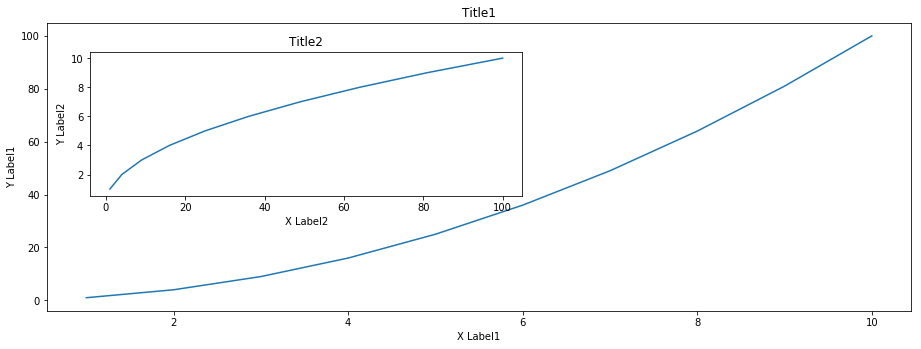

In [55]:
fig1 = plt.figure()
axes1 = fig1.add_axes([0.1,0.1,2,1])
axes2 = fig1.add_axes([0.2,0.5,1,0.5]) #adding another axes for plotting within the bigger plot

#First Plot
axes1.plot(x,y)
axes1.set_xlabel('X Label1')
axes1.set_ylabel('Y Label1')
axes1.set_title('Title1')

#Second Plot
axes2.plot(y,x)
axes2.set_xlabel('X Label2')
axes2.set_ylabel('Y Label2')
axes2.set_title('Title2')

plt.show()

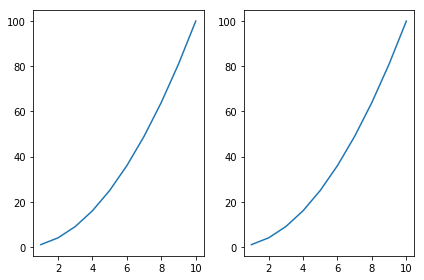

In [71]:
fig1, axes2 = plt.subplots(nrows=1,ncols=2)
for cx in axes2: #the axes object is iterable
    cx.plot(x,y)
    plt.tight_layout() #to ensure no overlaps

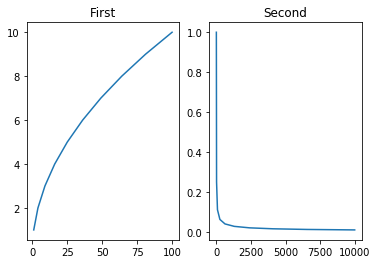

In [95]:
#since the axes object is iterable, we can use indices as well
fig1, axes2 = plt.subplots(nrows=1,ncols=2)
axes2[0].plot(x*x,y/x)
axes2[0].set_title('First')

axes2[1].plot(x*y*x,x/y/x)
axes2[1].set_title('Second')
plt.show()

Adding legends
--

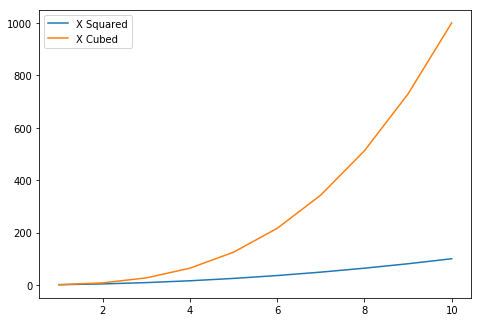

In [104]:
fig3 = plt.figure()
axes3 = fig3.add_axes([0,0,1,1])

axes3.plot(x,x*x,label='X Squared')
axes3.plot(x,x*x*x,label='X Cubed')

axes3.legend(loc=0) #loc=0 selects the best suited point for the legends
plt.show()

Formatting
--

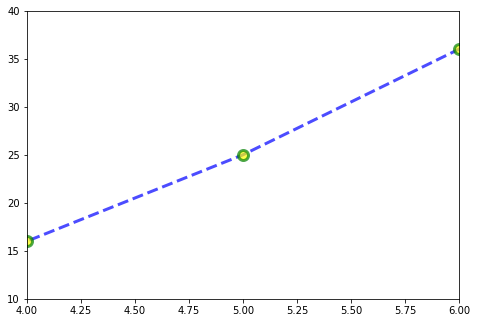

In [151]:
fig4 = plt.figure()
axes4 = fig4.add_axes([0,0,1,1])
axes4.plot(x,y,color='blue', linewidth = 3,linestyle = '--', marker = 'o',markersize=10, markerfacecolor='yellow',
           markeredgecolor = 'green' ,markeredgewidth = 3, alpha=0.7) #alpha for transperancy

##Setting limits for the x and y axes
axes4.set_xlim(4,6)
axes4.set_ylim(10,40)

plt.show()

# Seaborn

In [10]:
import seaborn as sns

In [9]:
%matplotlib inline

In [11]:
#using the inbuilt dataset
tips = sns.load_dataset('tips')

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


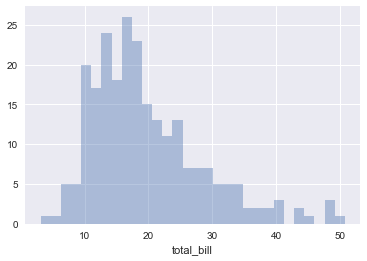

In [202]:
sns.distplot(tips['total_bill'],kde=False, bins = 30) #remove kde(kernel density estimation) to get just a histogram

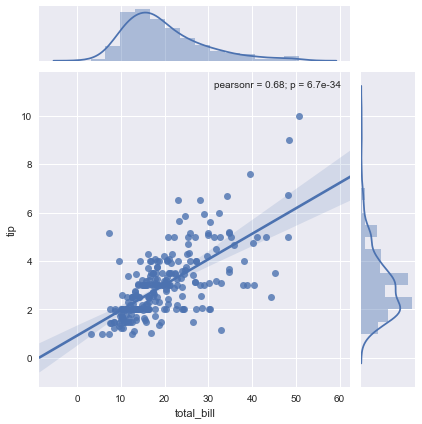

In [203]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind = 'reg')
#kind arguments with reg provides a regression line for the plot
#other arguments for kde can be hex, scatter(default), etc(check documentation)

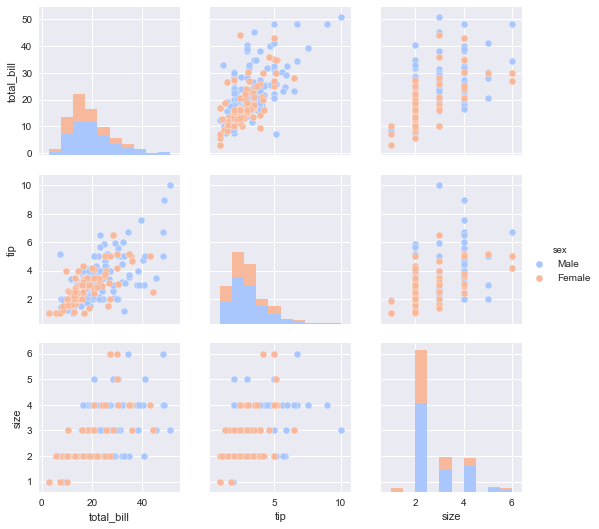

In [39]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
#pairs plots all the datapoints in the dataframe

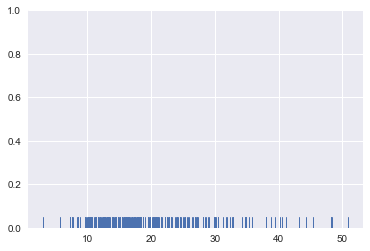

In [47]:
sns.rugplot(tips['total_bill'])
#Kind of similar to the distplot(below) with the histogram but displayed in a different manner

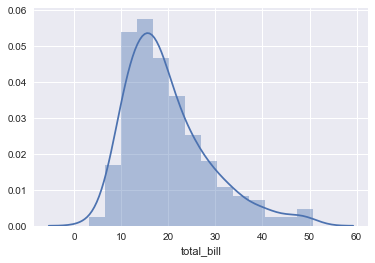

In [204]:
sns.distplot(tips['total_bill'])

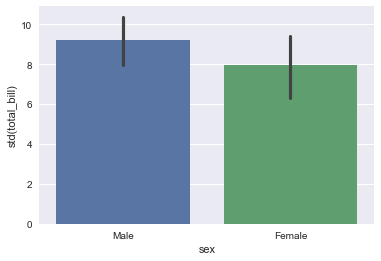

In [205]:
sns.barplot(x='sex',y="total_bill",data=tips,estimator=np.std)
#different estimators can be used here(mean by default)

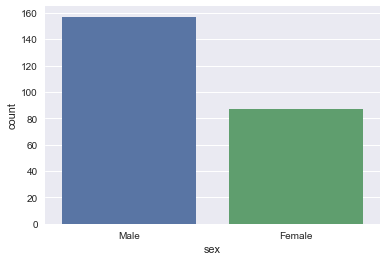

In [206]:
sns.countplot(x='sex', data=tips)
#Similar to the count() in pandas

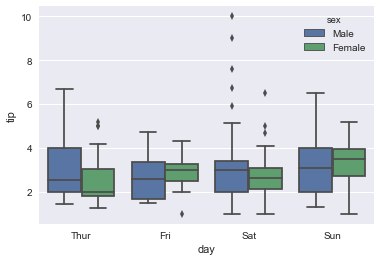

In [207]:
sns.boxplot(x='day',y='tip',data=tips,hue='sex')
#Shows distribution

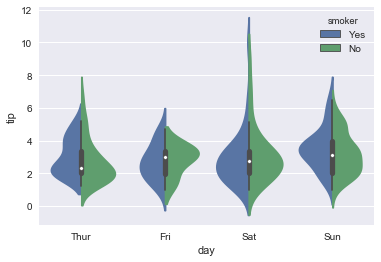

In [208]:
sns.violinplot(x='day',y='tip',data=tips, hue='smoker',split=True)
#Shows distribution

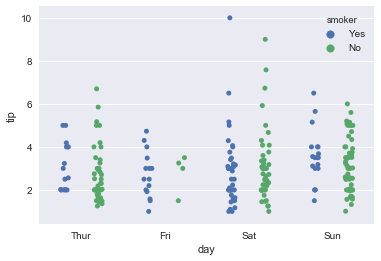

In [66]:
sns.stripplot(x='day',y='tip',data=tips, hue='smoker',split=True, jitter=True)
#Jitter adds a bit of noise

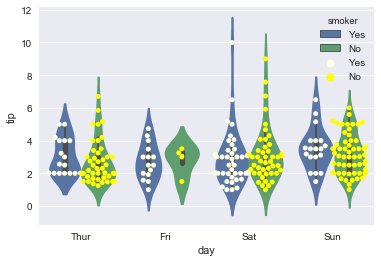

In [209]:
sns.violinplot(x='day',y='tip',data=tips, hue='smoker')
sns.swarmplot(x='day',y='tip',data=tips, hue='smoker',split=True,color='yellow')
#Using violinplot alongside the swarmplot adds in a lot more depth to the information being shown

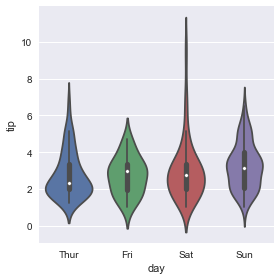

In [210]:
sns.factorplot(x='day',y='tip',data=tips,kind='violin')
#Probably the best plotitng funciton to use. 'Kind=' can take arguments for all the above types of plot discussed 

Matrix Plots
--

In [89]:
fligts = sns.load_dataset('flights')#adding another dataset--we already have the tips dataset
fligts.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [90]:
##The data needs to be present in a matrix form. Right now we have it indexed but should have variable on the index
##side as well. We do a correlation to create a matrix and then use the heatmap to plot it

In [95]:
fl = fligts.corr()
tc = tips.corr()

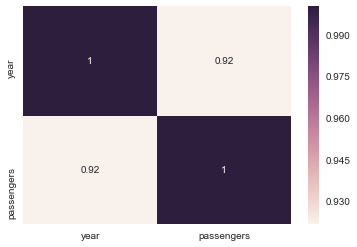

In [98]:
sns.heatmap(fl,annot=True)

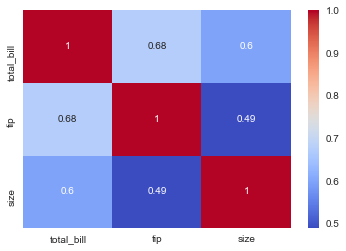

In [100]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [101]:
##using pivot table to convert the flight data to matrix form

In [103]:
flp=fligts.pivot_table(index='month',columns='year',values='passengers')

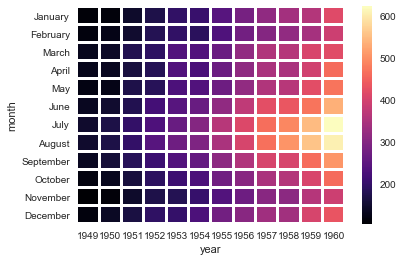

In [109]:
sns.heatmap(flp, cmap='magma', linecolor='white',linewidths=2)##This is a really infomative way of showing the data

In [144]:
#sns.clustermap(flp)is another way of clustering similar data together however, it is not running in the jupyter note
#book

Grids
--

In [116]:
iris = sns.load_dataset('iris')#Introduction another dataset to plot with
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


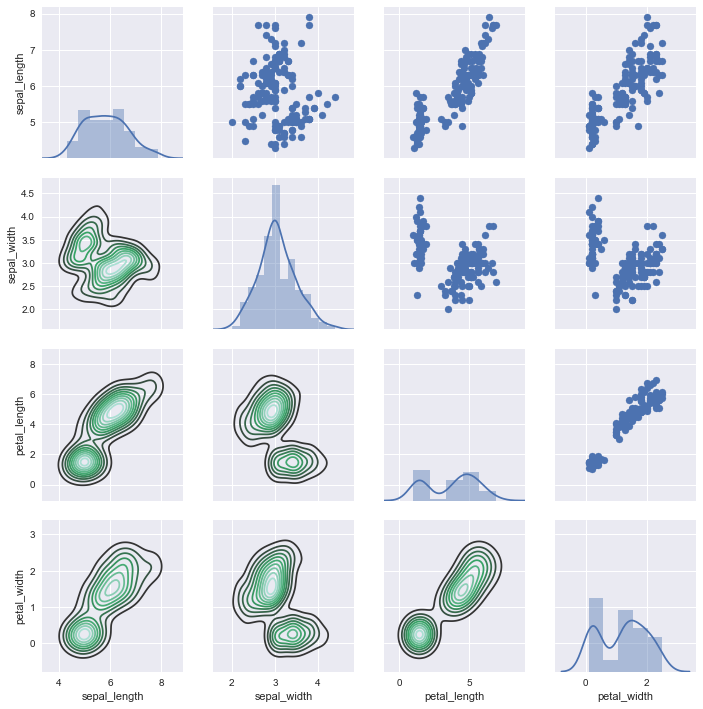

In [211]:
##PAIRGRIDS
i=sns.PairGrid(iris)##More controllable version of pairplot
i.map_diag(sns.distplot)
i.map_upper(plt.scatter)
i.map_lower(sns.kdeplot)

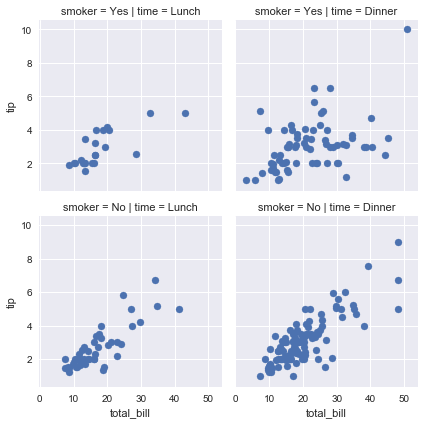

In [132]:
##FACETGRIDS
i=sns.FacetGrid(row='smoker',col='time',data=tips)
i.map(plt.scatter,'total_bill','tip')

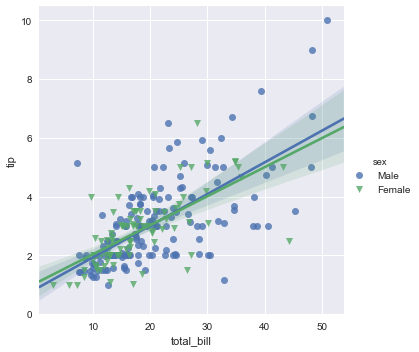

In [137]:
##REGRESSION PLOTS Using lmplot
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'])

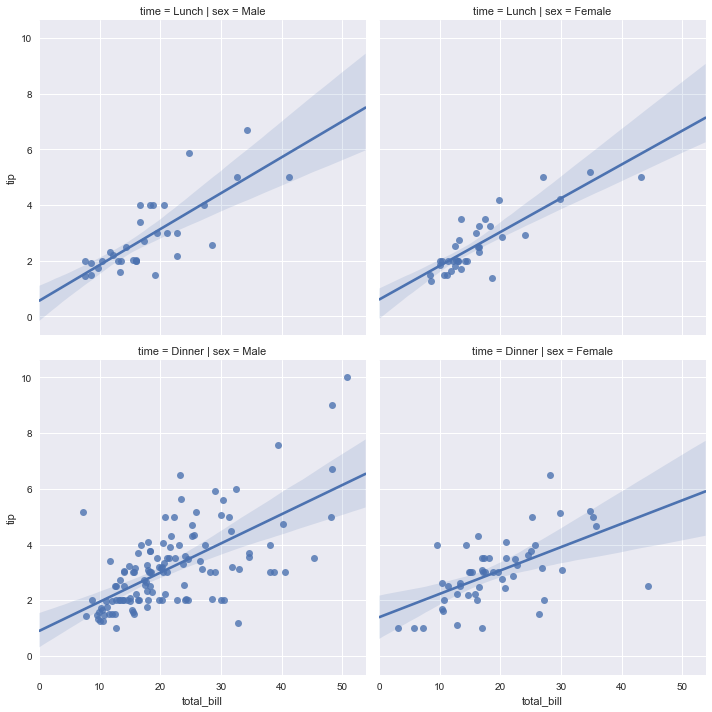

In [141]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time') #using col and row instead of hue

# Pandas built-in visualisations

In [150]:
df1 = pd.read_csv('df1',index_col=0)
df2 = pd.read_csv('df2')

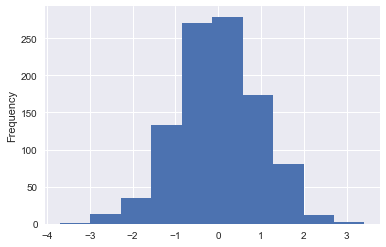

In [157]:
##HISTOGRAM
#df1['A'].plot(kind='hist') This produces the same result as the line below
df1['A'].plot.hist()

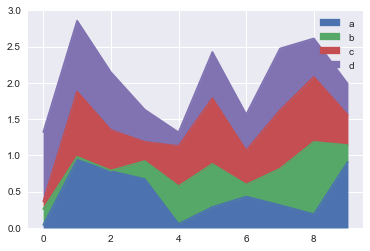

In [158]:
##AREA Plot
df2.plot.area()

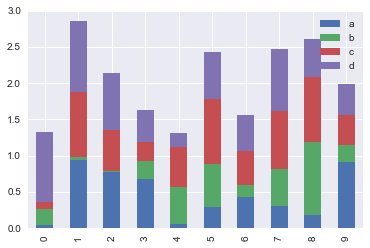

In [162]:
##BAR Plot
df2.plot.bar(stacked = True)

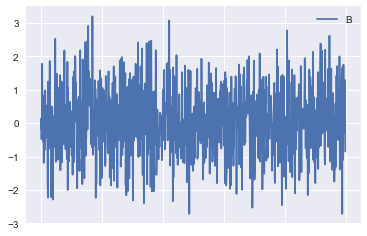

In [179]:
##LINE plot
df1.plot.line(y='B')

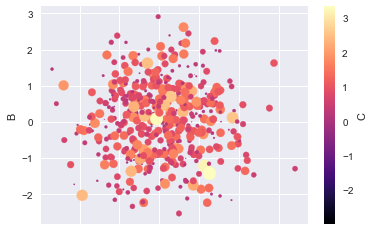

In [201]:
df1.plot.scatter(x='A',y='B',c ='C',s=df1['C']*50,cmap='magma')#c for color and s for size

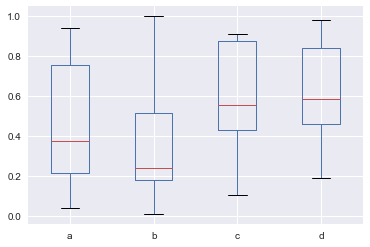

In [213]:
##BOX Plots
df2.plot.box()

In [216]:
df = pd.DataFrame(np.random.randn(1000,2),columns=['a','b'])#creating a new random dataframe for the next plots

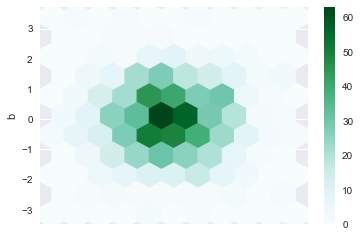

In [218]:
##HEXBIN plot
df.plot.hexbin(x='a',y='b',gridsize=10)

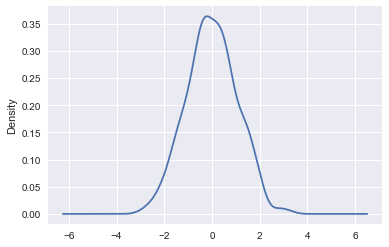

In [222]:
##KDE plot on a single column from the dataframe
df['a'].plot.kde()

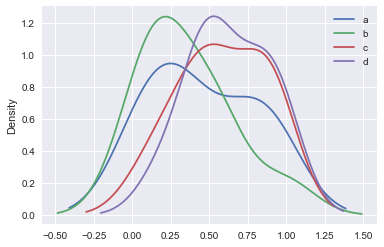

In [223]:
##DENSITY plot on all the columns from the dataframe
df2.plot.density()

# Plotly and Cufflinks - interactive visualisations

In [251]:
##Prereqs for plotly and cufflinks
##plotly connects pandas and python to an interactive JS library
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True) ##connects the javascript to the notebook
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [296]:
df4 = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

In [256]:
df5 = pd.DataFrame({'Category':['A','B','C'],'Values':[22,34,14]})

In [258]:
df4.iplot() #to use matplotlib we use df4.plot(). iplot() comes from plotly for interactive plots and is very useful

In [260]:
#SCATTER iplot
df4.iplot(kind='scatter',x='A',y='B',mode='markers')

In [262]:
#BAR iplot
df5.iplot(kind='bar',x='Category',y='Values')

In [264]:
#BAR iplot with sum --could use other aggregate functions like sum etc. as well
df4.sum().iplot(kind='bar')

In [265]:
#BOX iplot
df4.iplot(kind='box')

In [270]:
df6 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,40,10],'z':[5,1,3,2,4]})

In [271]:
##SURFACE iplot
df6.iplot(kind='surface')

In [277]:
##HISTOGRAM iplot
df4.iplot(kind='hist', bins=25)

In [279]:
##SPREAD iplot
df4.iplot(kind='spread')

In [301]:
##BUBBLE iplot
df4.iplot(kind='bubble',x='A',y='B',size='A',colorscale='prgn')

In [303]:
#SCATTER MATRIX iplots
df4.scatter_matrix()

In [304]:
#Check the available colorscales
cf.colors.scales()

# Geographical plotting

In [ ]:
##CHEATSHEET @ https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf

In [312]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True) ##connects the javascript to the notebook

In [376]:
##Plot based on national data

In [377]:
##First we need to create a data variable and a layout variable for the plot
data = dict(type='choropleth',
            locations = ['IA','NY','NJ','AZ','OH','FL'],
            locationmode = 'USA-states',
            colorscale = 'Portland',
            text = ['sample','text','goes','in','here','!'],
            z = [1.0,2.0,3.0,4.0,5.0,6.0],
            colorbar = {'title':'Colorbar title here'})
layout = dict(geo={'scope':'usa'})
choromap = go.Figure(data = [data],layout=layout)

In [378]:
iplot(choromap)

In [379]:
df7 = pd.read_csv('2011_US_AGRI_Exports')
data2 = dict(type='choropleth',
             colorscale = 'cividis',
             locations = df7['code'],
             locationmode = 'USA-states',
             z = df7['total exports'],
             text = df7['text'],
             marker = dict(line = dict(color='rgb(255,255,255)',width=0)),
             colorbar = {'title':'Millions USD'},
             )
layout = dict(title = '2011 US Agriculture by state',
              geo=dict(scope='usa',showlakes=True, lakecolor='rgb(85,173,240)'))

In [380]:
choromap2 = go.Figure(data=[data2],layout=layout)

In [381]:
iplot(choromap2)

In [ ]:
##Plot based on global data

In [389]:
df8 = pd.read_csv('2014_World_GDP')
df8['GDP (BILLIONS)'].head()

0     21.71
1     13.40
2    227.80
3      0.75
4      4.80
Name: GDP (BILLIONS), dtype: float64

In [421]:
data3 = dict(type='choropleth',
            locations = df8['CODE'],
            z = df8['GDP (BILLIONS)'],
            text = df8['COUNTRY'],
            colorbar = {'title':'World GDP in Billions'})
layout = dict(title = '2014 Global GDP',
              geo = dict(showframe=False,
                        projection = {'type':'robinson'}))
choromap3 = go.Figure(data=[data3],layout=layout)
iplot(choromap3)